<a href="https://colab.research.google.com/github/MunySafitri/Pengolahan-Citra-Digital/blob/main/ImageEnhancement_Mean%2CMedian%2CModus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import cv2

In [ ]:
def pad (matrix, banyak_padding):
    padded_matrix = np.pad(matrix,(0,banyak_padding),'constant')
    return padded_matrix

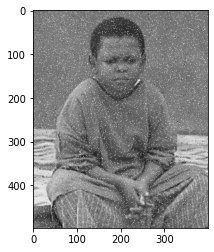

In [ ]:
image = cv2.imread('modul5.jpeg')
plt.imshow(image)
image.shape

## MEAN FILTER

In [ ]:
def mean(img, size) :
    fin = np.zeros((len(img),len(img)))
    matrix = pad(img, size)
    repeat = len(img)
    
    for x in range(size,len(matrix)-size) :
        for y in range(size,len(matrix)-size) :
            all = np.ravel(matrix[x-size:x+size+1,y-size:y+size+1])  
            mean = round(np.sum(all)/(size*size))
            fin[x][y] = mean
    
    return fin

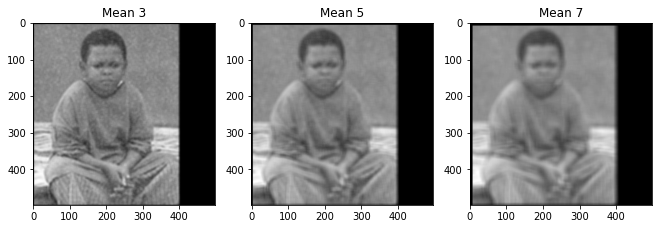

In [ ]:
mean3 = mean(image, 3)
mean5 = mean(image, 5)
mean7 = mean(image, 7)

plt.figure(figsize=(15,15))

plt.subplot(2,4,2)
plt.imshow(mean3, cmap="gray")
plt.title('Mean 3');

plt.subplot(2,4,3)
plt.imshow(mean5, cmap="gray")

plt.title('Mean 5');
plt.subplot(2,4,4)
plt.imshow(mean7, cmap="gray")

plt.title('Mean 7');
plt.show()

## MEDIAN FILTER

In [ ]:
def medFilt(img,size):
    result = np.zeros(img.shape)
    pad = np.pad(img,(size,size),mode='edge')
    for i in range(size,len(pad)-size):
        for j in range(size,len(pad)-size): 
            temp = np.ravel(pad[i-size:i+size+1,j-size:j+size+1])
            temp.sort()
            result[i-size,j-size] = temp[int(len(temp)/2)]
    return result

In [ ]:
med3 = medFilt(image, 3)
med5 = medFilt(image, 5)
med7 = medFilt(image, 7)

plt.figure(figsize=(15,15))

plt.subplot(2,4,2)
plt.imshow(med3, cmap='gray')
plt.title('Median 3');

plt.subplot(2,4,3)
plt.imshow(med5, cmap='gray')

plt.title('Median 5');
plt.subplot(2,4,4)
plt.imshow(med7, cmap='gray')

plt.title('Median 7');
plt.show()

IndexError: index 400 is out of bounds for axis 1 with size 400

## MODUS FILTER

In [ ]:
def findModus(array):
    temp = np.zeros(int(np.max(array))+1)
    for i in array:
        temp[int(i)]+=1
    max = np.max(temp)
    for i in range(len(temp)):
        if(max == temp[i]): 
            return i

def normalisasi(citra):
  min = np.min(citra)
  max = np.max(citra)
  return np.round((citra-min)*255/(max-min))

def modusa(citra, size):
    result = np.zeros(citra.shape)
    pad = np.pad(citra,(size,size),mode='symmetric')
    for i in range(size,len(pad)-size):
        for j in range(size,len(pad)-size): 
            temp = np.ravel(pad[i-size:i+size+1,j-size:j+size+1])
            temp.sort()
            result[i-size,j-size] = findModus(temp)
    return normalisasi(result)

In [ ]:
mod3 = modusa(image, 3)
mod5 = modusa(image, 5)
mod7 = modusa(image, 7)

plt.figure(figsize=(15,15))

plt.subplot(2,4,2)
plt.imshow(mod3, cmap="gray")
plt.title('Modus 3');

plt.subplot(2,4,3)
plt.imshow(mod5, cmap="gray")

plt.title('Modus 5');
plt.subplot(2,4,4)
plt.imshow(mod7, cmap="gray")

plt.title('Modus 7');
plt.show()

IndexError: index 400 is out of bounds for axis 1 with size 400